Importing the model


In [2]:
from cobra.io import read_sbml_model, write_sbml_model
model = read_sbml_model('/Users/nikow/github-classroom/27410/group-assingment-team-4/yeast-GEM-8.7.0/model/yeast-GEM2.xml') # loading
from cobra import Reaction, Metabolite, Gene
import pandas as pd

### Identification of upregulation and downregulation gene targets
In order to optimize the production of beta-farnesene in yeast, computational tools can be utilized to identify gene targets. Those tools can be algorithms to discover gene deletions that increase overall productivity, or other analysis methods that aim to discover up- or down-regulation gene targets. The advantage of the later method is that gene deletions tend to negatively affect the growth rate, in contrast with modifications in the expression level of target genes.
Here, we used the flux variability scanning method based on enforced objective flux (FVSEOF), which identifies gene amplification targets (J.M. Park et al 2012). The CAMEO tool for running this analysis is used, based on an objective flux.

In [5]:

from cameo.strain_design.deterministic.flux_variability_based import FSEOF
fseof = FSEOF(model)
result = fseof.run(target = model.reactions.R08695)
df = result.data_frame

For the next step, we are going to plot all the gene targets that display changed levels of flux, when our objective target is the beta-farnesene synthesis reaction.

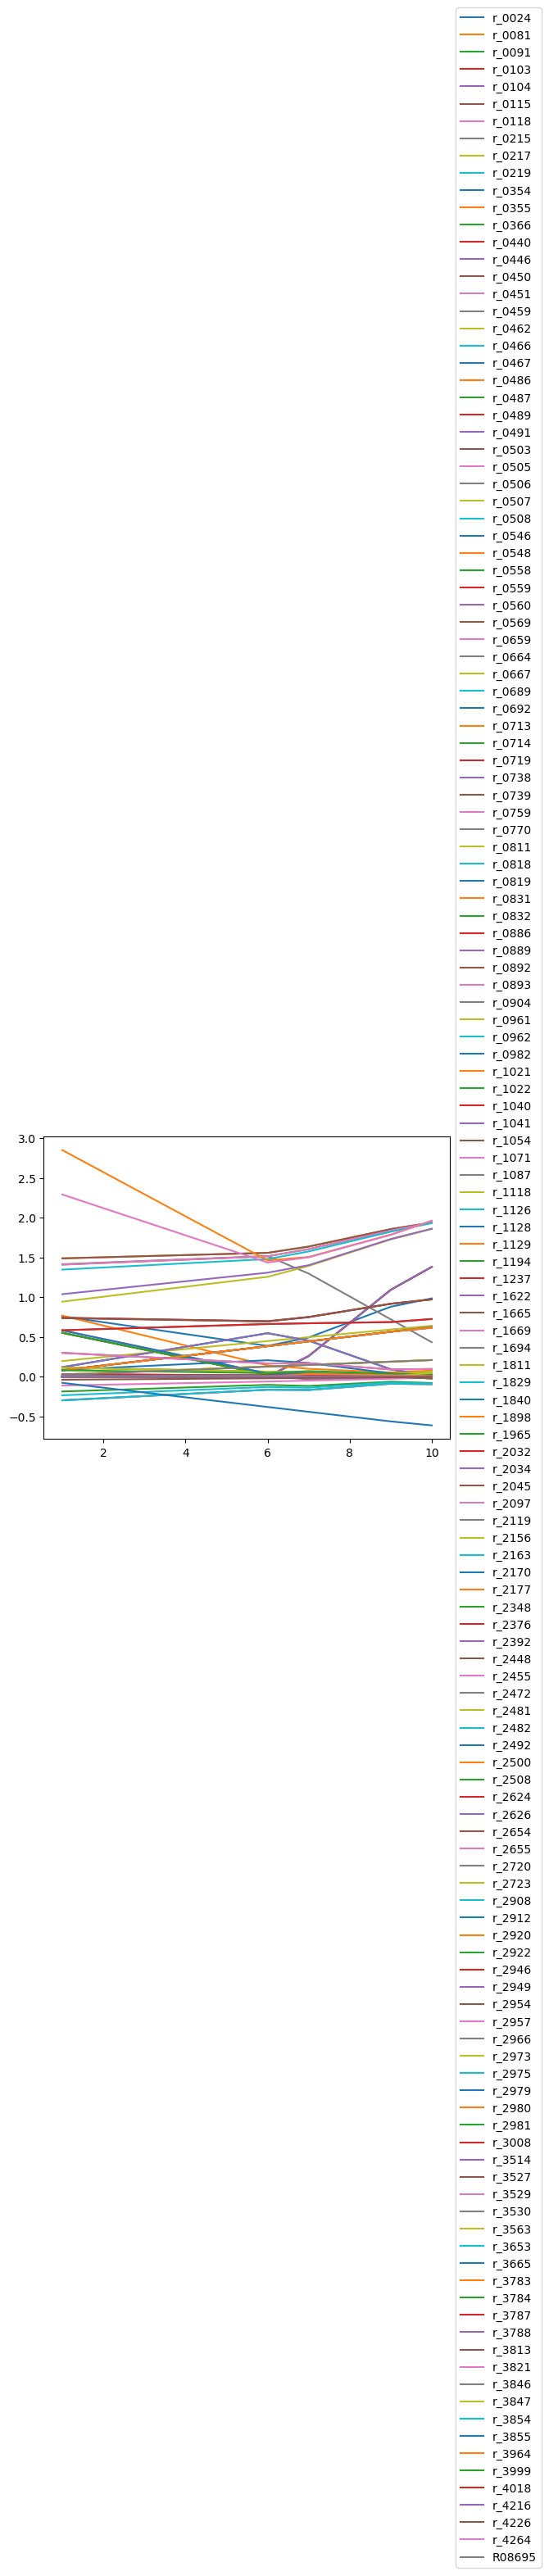

In [6]:
from matplotlib import pyplot as plt
result.data_frame.T.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Fluxes of zero were removed, and values were sorted.

In [7]:

df= df.sort_values([1], ascending = False)
from pytest import approx 
removed_zero = (df != approx(0.0)).all(axis=1)
df = df.loc[removed_zero]
df.head()

,1,2,3,4,5,6,7,8,9,10
r_1021,2.848394,2.570965,2.293535,2.016105,1.738675,1.461246,1.503830,1.644335,1.784840,1.959941
r_4264,2.289830,2.118852,1.947874,1.776895,1.605917,1.434939,1.500182,1.641537,1.782892,1.958882
r_0892,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0486,1.486771,1.500628,1.514486,1.528344,1.542202,1.556060,1.634907,1.744867,1.854827,1.937830
r_0770,1.413461,1.433870,1.454280,1.474689,1.495098,1.515507,1.295578,1.008024,0.720471,0.431700


Alternative way to plot the the genes:

In [8]:
import numpy as np


Tne relative changes for each gene flux can be calculated, and we filter the ones under 80% out.

In [9]:
df['relative_change_in_flux'] = (df[10]-df[1])/df[10] +1
target_reactions_df = df[df['relative_change_in_flux'] > 1.8]

In [10]:
target_reactions_df

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.000000,-0.000000,-0.000000,inf
r_0738,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_1129,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0104,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0739,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0558,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0560,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.614068,1.871617
r_0904,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.503330,0.563771,0.624131,1.873687
r_0355,0.026279,0.046514,0.066750,0.086986,0.107222,0.127458,0.147630,0.167777,0.187924,0.208044,1.873685
r_0462,0.026279,0.046514,0.066750,0.086986,0.107222,0.127458,0.147630,0.167777,0.187924,0.208044,1.873685


Text(0.5, 1.0, 'Reactions with a relative change in Flux > 80%')

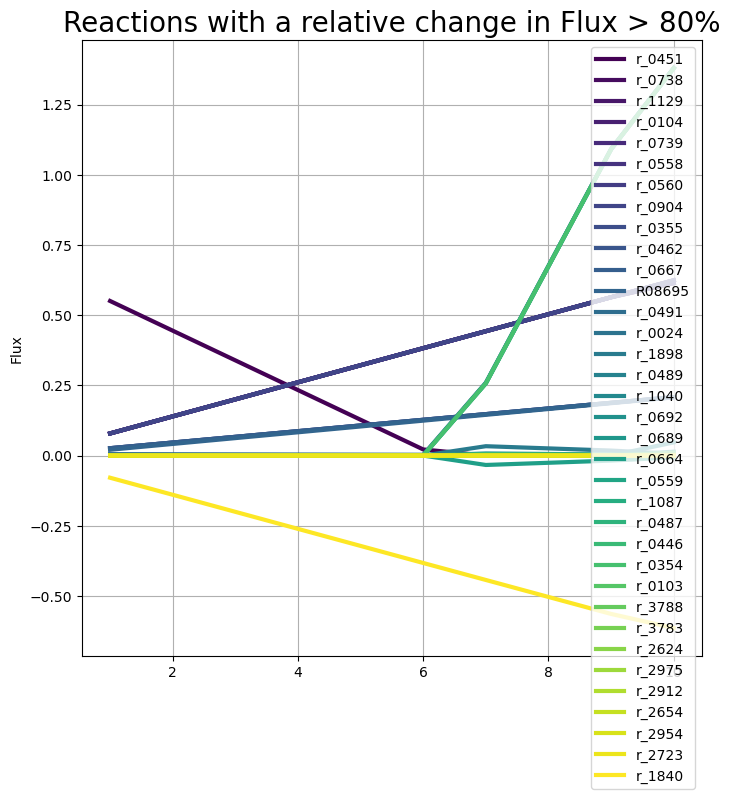

In [11]:
df = target_reactions_df.drop(labels='relative_change_in_flux', axis=1)
fig = df.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig.set_ylabel('Flux')
fig.set_title('Reactions with a relative change in Flux > 80%', size=20)

Lowest flux genes:

In [12]:
target_reactions_df.tail()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_2912,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2654,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2954,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_2723,-0.000065,-0.000060,-0.000054,-0.000048,-0.000042,-0.000036,-0.000000,0.00000,0.000000,0.000000,inf
r_1840,-0.078836,-0.139543,-0.200251,-0.260959,-0.321666,-0.382374,-0.442889,-0.50333,-0.563771,-0.614068,1.871617


Highest flux genes:

In [13]:
target_reactions_df.head()

,1,2,3,4,5,6,7,8,9,10,relative_change_in_flux
r_0451,0.550497,0.444766,0.339036,0.233305,0.127575,0.021844,-0.000000,-0.00000,-0.000000,-0.000000,inf
r_0738,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.624131,1.873687
r_1129,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.614068,1.871617
r_0104,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.614068,1.871617
r_0739,0.078836,0.139543,0.200251,0.260959,0.321666,0.382374,0.442889,0.50333,0.563771,0.624131,1.873687


The 5 genes with the highest change in flux are shown below, as potential targets for upregulation.

In [14]:
model.reactions.r_0739

Reaction identifier,r_0739
Name,mevalonate pyrophoshate decarboxylase
Memory address,0x1c19395cd10
Stoichiometry,s_0018 + s_0434 --> s_0394 + s_0456 + s_0943 + s_1322 (R)-5-diphosphomevalonic acid + ATP --> ADP + carbon dioxide + isopentenyl diphosphate + phosphate
GPR,YNR043W
Lower bound,0.0
Upper bound,1000.0


In [15]:
model.reactions.r_0104

Reaction identifier,r_0104
Name,acetyl-CoA C-acetyltransferase
Memory address,0x1c193539790
Stoichiometry,2.0 s_0376 <=> s_0370 + s_0532 2.0 acetyl-CoA <=> acetoacetyl-CoA + coenzyme A
GPR,YPL028W
Lower bound,-1000.0
Upper bound,1000.0


In [16]:
model.reactions.r_1129

Reaction identifier,r_1129
Name,coenzyme A transport
Memory address,0x1c193b76b10
Stoichiometry,s_0529 --> s_0532 coenzyme A --> coenzyme A
GPR,YHR002W
Lower bound,0.0
Upper bound,1000.0


In [17]:
model.reactions.r_0738

Reaction identifier,r_0738
Name,mevalonate kinase (UTP)
Memory address,0x1c19395c0d0
Stoichiometry,s_0028 + s_1559 --> s_0019 + s_0794 + s_1538 (R)-mevalonate + UTP --> (R)-5-phosphomevalonic acid + H+ + UDP
GPR,YMR208W
Lower bound,0.0
Upper bound,1000.0


In [18]:
model.reactions.r_0451

Reaction identifier,r_0451
Name,fumarase
Memory address,0x1c19376aa90
Stoichiometry,s_0727 + s_0807 <=> s_0068 fumarate + H2O <=> (S)-malate
GPR,YPL262W
Lower bound,-1000.0
Upper bound,1000.0


The analysis identified four potential upregulations, in the genes encoding mevalonate kinase (MVK), mevalonate pyrophosphate decarboxylase (MVD), acetyl-CoA C-acetyltransferase or acetoacetyl-CoA thiolase (AT) and an acetyl-CoA transport reaction. The respective genes for the first three reactions in <i>S. cerevisiae</i> are <i>ERG12</i>, <i>ERG19</i> and <i>ERG10</i>. They are known upregulation targets when aiming to increase the production of terpenoids in <i>S. cerevisiae</i> and their effectiveness has been demonstrated in many instances. This validates our analysis, however we did not end up with any novel gene targets.